# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
mu.code_toggle()

In [4]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [5]:
import pandas as pd

In [6]:
import ast

In [7]:
#colls_before = pd.read_json('demokrati_before.json')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [10]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [11]:
keyword = 'omsorg'

In [12]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [13]:
comm = gnl.community_dict(keyword_graph)

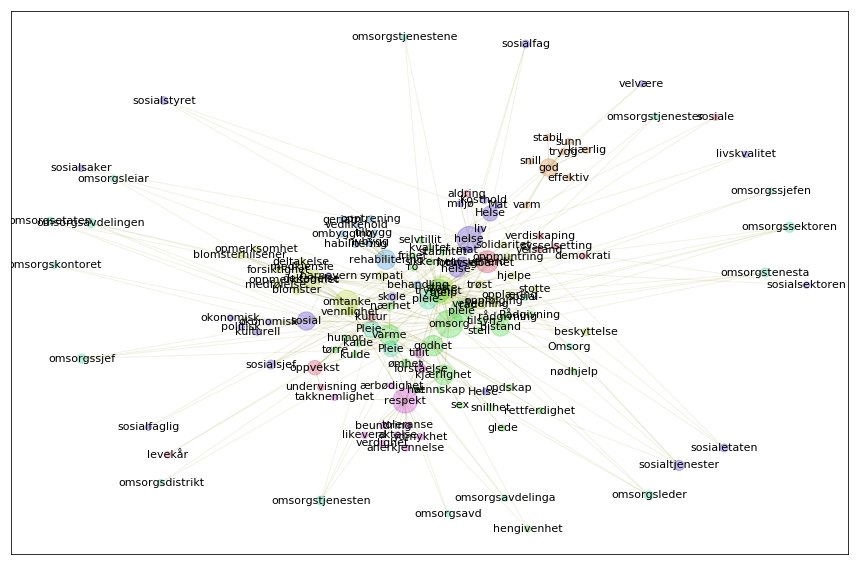

In [14]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [15]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [16]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>kjærlighet, oppmerksomhet, velferd, kultur, helse, aldring, sympati, Helse, ømhet, livskvalitet, oppmuntring, helse-, opplæring, nærhet, omtanke, tilsyn, veiledning, sosiale, støtte, trivsel, blomster, hengivenhet, sosial, varme, rehabilitering, pleie, sosialtjenester, råd, oppvekst, omsorg, frihet, medfølelse, liv, trygghet, beskyttelse, trøst, Rådgivning, bistand, rådgivning, skole, oppfølging, barnevern, godhet, respekt, hjelp, blomsterhilsener, pleie-, deltagelse, vennlighet</span>

<span style='font-size:1.1em'>kjærlighet, omtanke, omsorg, varme, trygghet, godhet, respekt, ømhet</span>

<span style='font-size:1.1em'>omtanke, veiledning, støtte, bistand, omsorg, oppfølging, hjelp, deltagelse</span>

<span style='font-size:1.1em'>helse, velferd, sosialtjenester, omsorg</span>

<span style='font-size:1.1em'>kjærlighet, omtanke, omsorg, varme, trygghet, godhet</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [17]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### omtanke-støtte
<span style='font-size:1.1em'>omtanke, støtte, hjelp, deltagelse, veiledning, oppfølging, oppmerksomhet, sympati, blomster, medfølelse, vennlighet, oppmuntring, opplæring, deltakelse, beskyttelse, trøst, medkjensle, blomsterhilsener, hjelpe, forsiktighet, opmerksomhet, solidaritet, stotte, råd</span>
### omsorg-trygghet
<span style='font-size:1.1em'>omsorg, trygghet, pleie, varme, godhet, kjærlighet, bistand, ømhet, nærhet, tilsyn, rådgivning, stabilitet, forutsigbarhet, kvalitet, kulde, hengivenhet, ondskap, hat, ro, humor, vennskap, frihet, snillhet, kalde, sex, Rådgivning, glede, nødhjelp, rettferdighet, sikkerhet, stell, selvtillit, tørre</span>
### pleie--Pleie-
<span style='font-size:1.1em'>pleie-, Pleie-, Pleie, omsorgssektoren, omsorgstenesta, omsorgstjenesten, omsorgsavdelingen, omsorgsleder, omsorgssjef, omsorgsetaten, omsorgskontoret, Omsorg, omsorgssjefen, omsorgsavdelinga, omsorgsavd, omsorgsleiar, omsorgstjenestene, omsorgsdistrikt, omsorgstjenester, sosial-</span>
### rehabilitering-behandling
<span style='font-size:1.1em'>rehabilitering, behandling, nybygg, opptrening, ombygging, tilbygg, vedlikehold, geriatri, habilitering</span>
### helse-sosial
<span style='font-size:1.1em'>helse, sosial, helse-, Helse, trivsel, sosialtjenester, sosialsjef, sosialstyret, sosialfag, sosialetaten, skole, politisk, sosialsaker, Helse-, Mat, økonomisk, mat, okonomisk, livskvalitet, Kosthold, kulturell, miljø, liv, sosialfaglig, sosialsektoren, velvære, barnevern</span>
### respekt-forståelse
<span style='font-size:1.1em'>respekt, forståelse, tillit, aktelse, takknemlighet, ydmykhet, toleranse, ærbødighet, beundring, likeverd, verdighet, anerkjennelse</span>
### velferd-oppvekst
<span style='font-size:1.1em'>velferd, oppvekst, kultur, verdiskaping, undervisning, sosiale, levekår, demokrati, velstand, aldring, sysselsetting</span>
### god-sunn
<span style='font-size:1.1em'>god, sunn, trygg, effektiv, varm, stabil, snill, kjærlig</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [18]:
reference = pd.read_json('avis_agg.json')

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

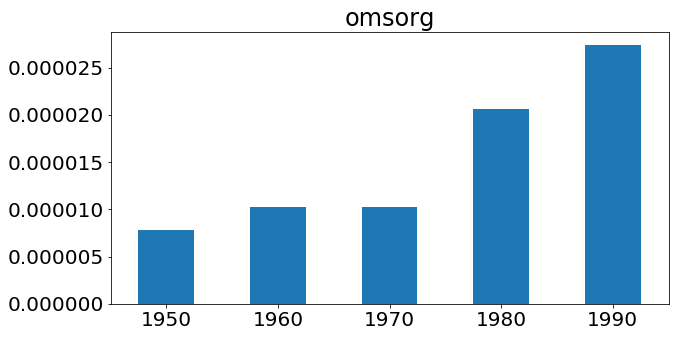

In [20]:
barchart(keyword, reference);

In [21]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [26]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [27]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [28]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0511286,0.050283,0.0509477,0.0544368,0.0581388
og,0.0395167,0.0425548,0.0455112,0.0500315,0.051886
",",0.0355327,0.0379723,0.0384727,0.040271,0.0450025
for,0.0388579,0.0341296,0.0367773,0.0332141,0.0300488
i,0.0172914,0.0201519,0.0196068,0.0206132,0.0204053
som,0.0168389,0.0153643,0.0163619,0.014797,0.0123746
er,0.0139766,0.013245,0.0136265,0.0145602,0.0133259
til,0.0113588,0.0129521,0.0133484,0.0139775,0.0150055
det,0.0119916,0.0113335,0.0112102,0.0100118,0.00782424
av,0.0100135,0.0117169,0.011074,0.00999292,0.008442


In [29]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [30]:
nb.normalize_corpus_dataframe(pmi)

True

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [31]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kjærlighet,4.49132e-05,3.06202e-05,2.99364e-05,1.81434e-05,1.11067e-05
dra,4.41629e-05,2.91273e-05,2.82725e-05,1.57716e-05,8.53868e-06
rørende,4.36512e-05,2.95127e-05,2.87318e-05,1.73388e-05,1.06952e-05
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
huden,4.34612e-05,4.94566e-06,1.05019e-05,7.87909e-06,2.10523e-06
kjærlig,4.32986e-05,2.97583e-05,2.91937e-05,1.77726e-05,1.09916e-05
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
godhet,4.31217e-05,2.96048e-05,2.91249e-05,1.76061e-05,1.09469e-05
plei,4.30884e-05,2.2738e-05,2.45643e-05,1.55401e-05,1.00069e-05
eders,4.3058e-05,2.95686e-05,2.87525e-05,1.62791e-05,8.23583e-06


In [32]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kjærlighet,4.49132e-05,3.06202e-05,2.99364e-05,1.81434e-05,1.11067e-05
dra,4.41629e-05,2.91273e-05,2.82725e-05,1.57716e-05,8.53868e-06
rørende,4.36512e-05,2.95127e-05,2.87318e-05,1.73388e-05,1.06952e-05
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
huden,4.34612e-05,4.94566e-06,1.05019e-05,7.87909e-06,2.10523e-06
kjærlig,4.32986e-05,2.97583e-05,2.91937e-05,1.77726e-05,1.09916e-05
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
godhet,4.31217e-05,2.96048e-05,2.91249e-05,1.76061e-05,1.09469e-05
plei,4.30884e-05,2.2738e-05,2.45643e-05,1.55401e-05,1.00069e-05
eders,4.3058e-05,2.95686e-05,2.87525e-05,1.62791e-05,8.23583e-06


In [33]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
kjærlighet,4.49132e-05,3.06202e-05,2.99364e-05,1.81434e-05,1.11067e-05
trygder,3.89734e-05,3.01969e-05,2.89755e-05,1.69163e-05,9.22638e-06
sosiale,4.03982e-05,3.00393e-05,2.80998e-05,1.65173e-05,9.70142e-06
loven,3.59086e-05,2.99335e-05,2.56189e-05,1.55707e-05,8.35096e-06
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
lov,3.85361e-05,2.97765e-05,2.79061e-05,1.71172e-05,9.84368e-06
kjærlig,4.32986e-05,2.97583e-05,2.91937e-05,1.77726e-05,1.09916e-05
Lov,3.82632e-05,2.96272e-05,2.87294e-05,1.77252e-05,1.04959e-05
godhet,4.31217e-05,2.96048e-05,2.91249e-05,1.76061e-05,1.09469e-05


In [34]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
kjærlighet,4.49132e-05,3.06202e-05,2.99364e-05,1.81434e-05,1.11067e-05
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
helsevern,3.50491e-05,2.92883e-05,2.96546e-05,1.84763e-05,1.12997e-05
trygd,2.47282e-05,2.76487e-05,2.92029e-05,1.68959e-05,8.5037e-06
kjærlig,4.32986e-05,2.97583e-05,2.91937e-05,1.77726e-05,1.09916e-05
Sosial,4.02898e-05,2.92566e-05,2.91258e-05,1.73916e-05,1.03082e-05
godhet,4.31217e-05,2.96048e-05,2.91249e-05,1.76061e-05,1.09469e-05
omsorg,4.29017e-05,2.94443e-05,2.91191e-05,1.79525e-05,1.10445e-05
omtanke,4.24732e-05,2.91272e-05,2.9028e-05,1.78806e-05,1.10408e-05


In [35]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
helsevern,3.50491e-05,2.92883e-05,2.96546e-05,1.84763e-05,1.12997e-05
kjærlighet,4.49132e-05,3.06202e-05,2.99364e-05,1.81434e-05,1.11067e-05
takk,4.26809e-05,2.90602e-05,2.89234e-05,1.80736e-05,1.14116e-05
barnevern,3.6603e-05,2.85209e-05,2.89127e-05,1.79699e-05,1.08559e-05
omsorg,4.29017e-05,2.94443e-05,2.91191e-05,1.79525e-05,1.10445e-05
omtanke,4.24732e-05,2.91272e-05,2.9028e-05,1.78806e-05,1.10408e-05
Avdeling,0,0,2.83899e-05,1.78774e-05,1.07754e-05
hjemmebasert,0,0,0,1.78524e-05,1.12674e-05


In [36]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
pleie,4.35161e-05,2.99194e-05,2.98228e-05,1.86737e-05,1.16815e-05
sosial,4.3243e-05,3.131e-05,3.05794e-05,1.88048e-05,1.15233e-05
takk,4.26809e-05,2.90602e-05,2.89234e-05,1.80736e-05,1.14116e-05
helsevern,3.50491e-05,2.92883e-05,2.96546e-05,1.84763e-05,1.12997e-05
hjemmebasert,0,0,0,1.78524e-05,1.12674e-05
helse,3.8011e-05,2.31839e-05,2.59764e-05,1.70864e-05,1.12325e-05
Fylkeskommunens,0,0,0,1.78466e-05,1.12086e-05
samferdsel,3.78269e-05,2.66168e-05,2.6086e-05,1.78209e-05,1.1203e-05
helsevesen,3.84221e-05,2.76584e-05,2.70937e-05,1.78295e-05,1.11565e-05
Takk,3.66463e-05,2.65795e-05,2.74979e-05,1.73576e-05,1.11243e-05


<br>
<br>

# Assosiasjoner og variasjon over år.

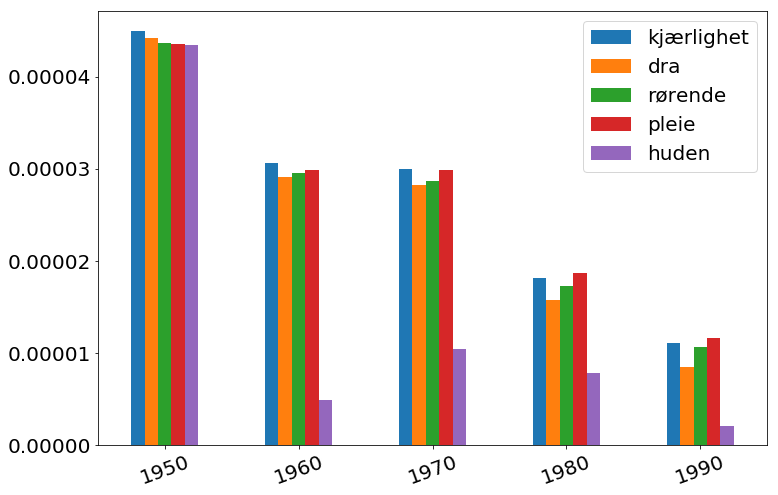

In [37]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [38]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

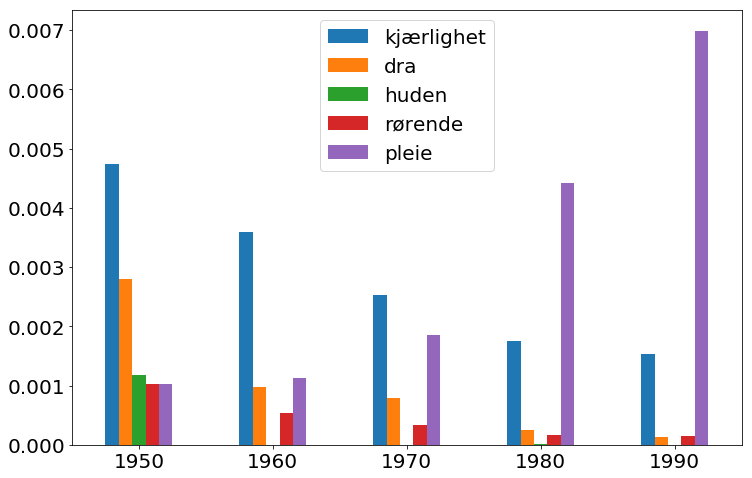

In [39]:
freq_assoc_val(agg, pmi, 0)

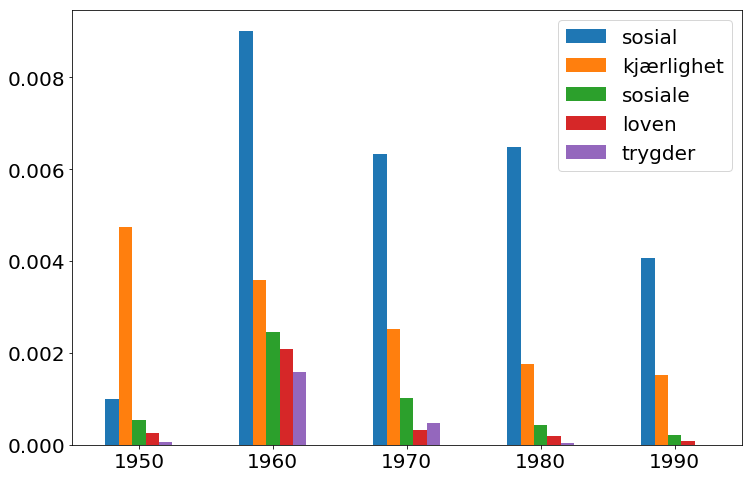

In [40]:
freq_assoc_val(agg, pmi, 1)

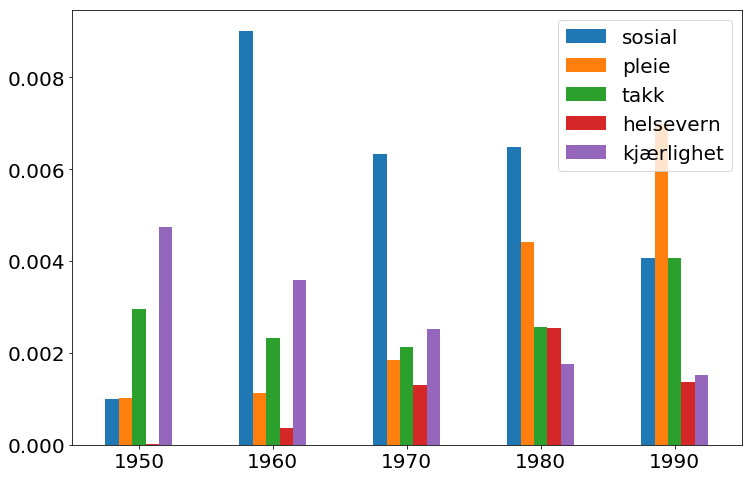

In [41]:
freq_assoc_val(agg, pmi, 3)

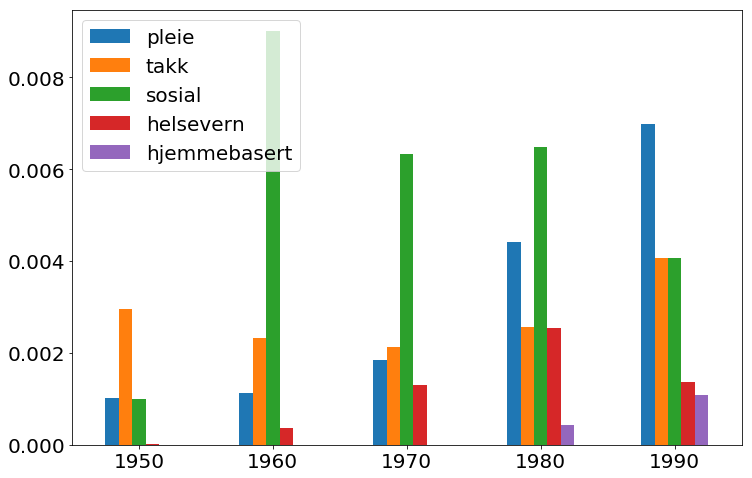

In [42]:
freq_assoc_val(agg, pmi, 4)

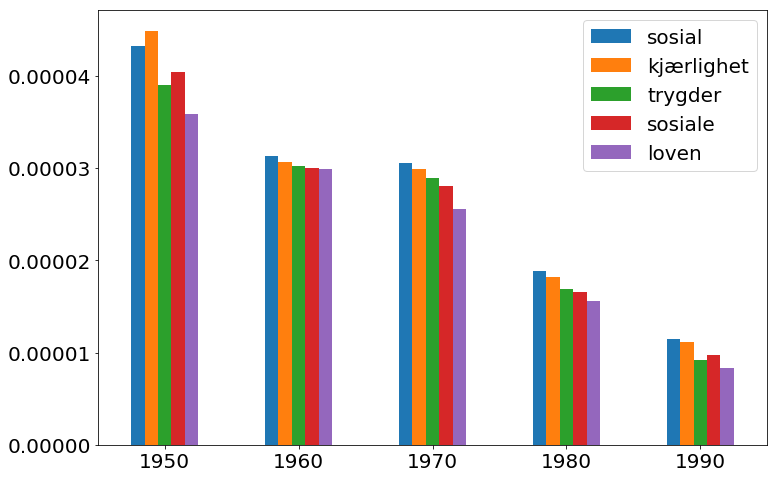

In [43]:
freq_assoc_val(pmi, pmi, 1)

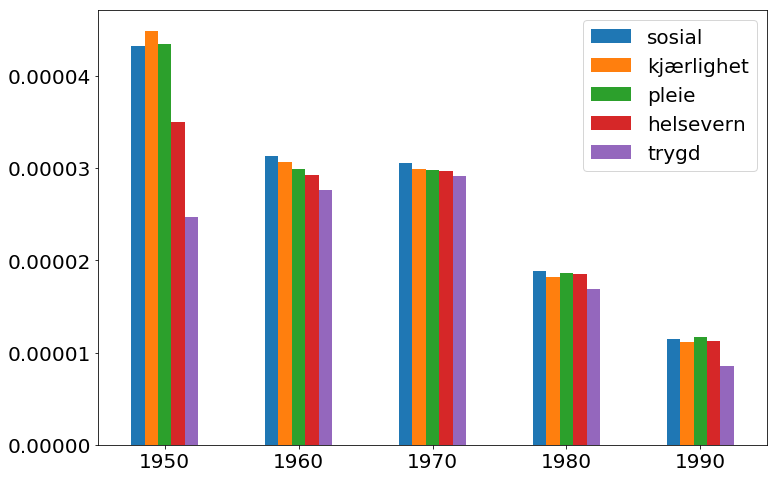

In [44]:
freq_assoc_val(pmi, pmi, 2)

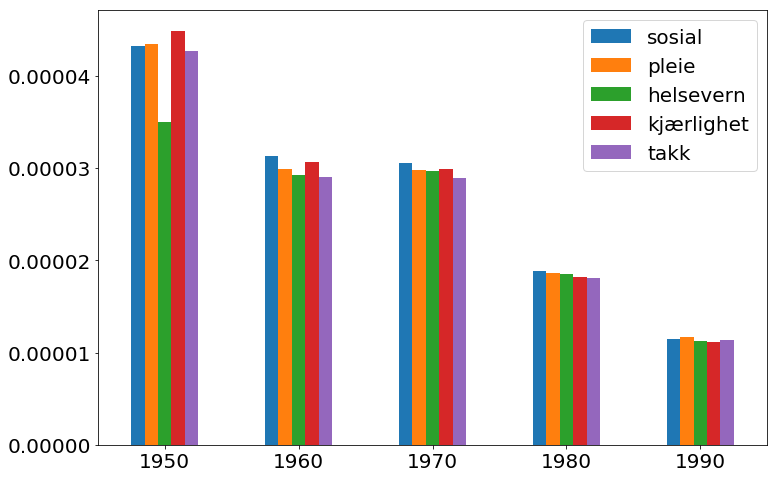

In [45]:
freq_assoc_val(pmi, pmi, 3)

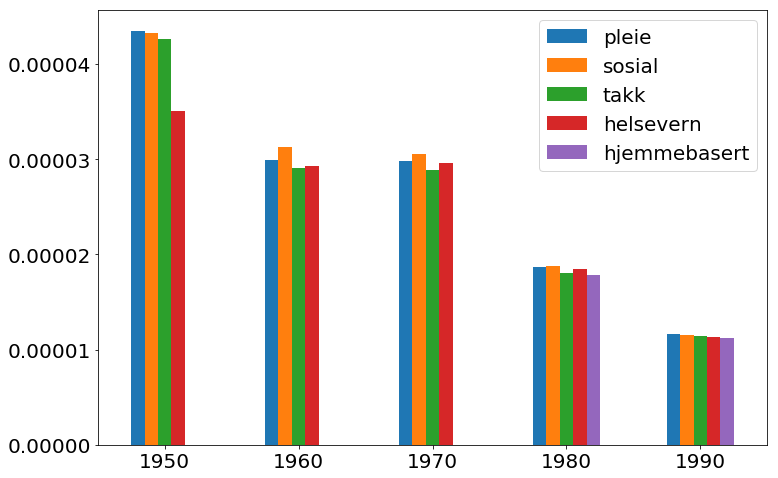

In [46]:
freq_assoc_val(pmi, pmi, 4)

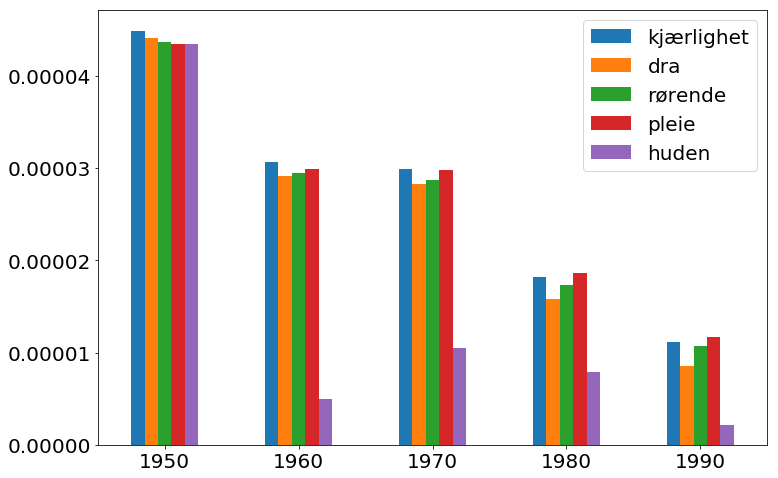

In [47]:
freq_assoc_val(pmi, pmi, 0)

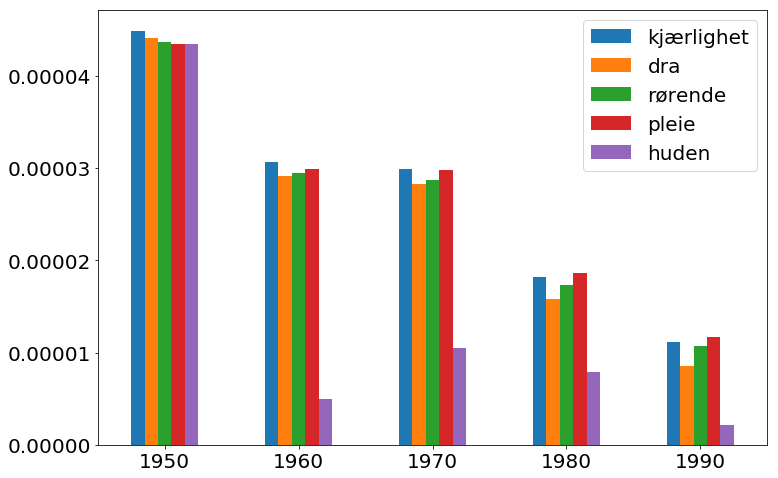

In [48]:
freq_assoc_val(pmi, pmi, 0)

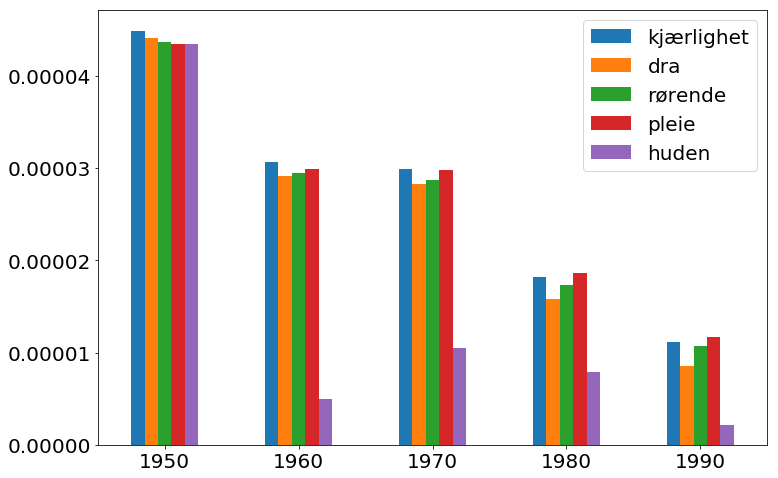

In [49]:
freq_assoc_val(pmi, pmi, 0)

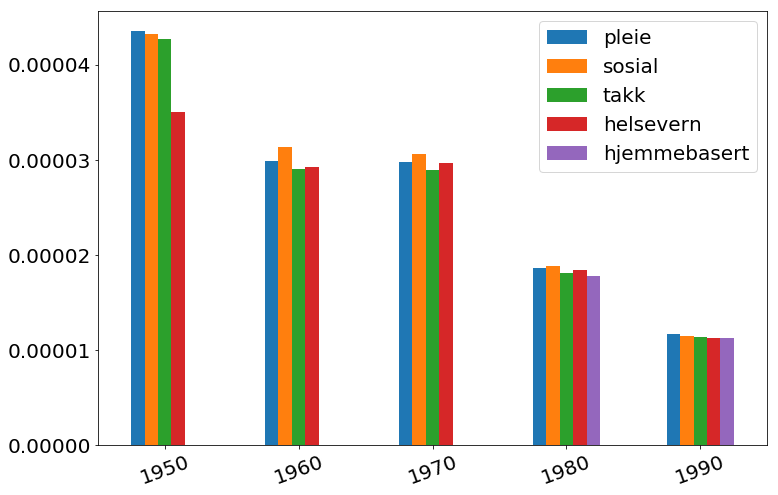

In [50]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

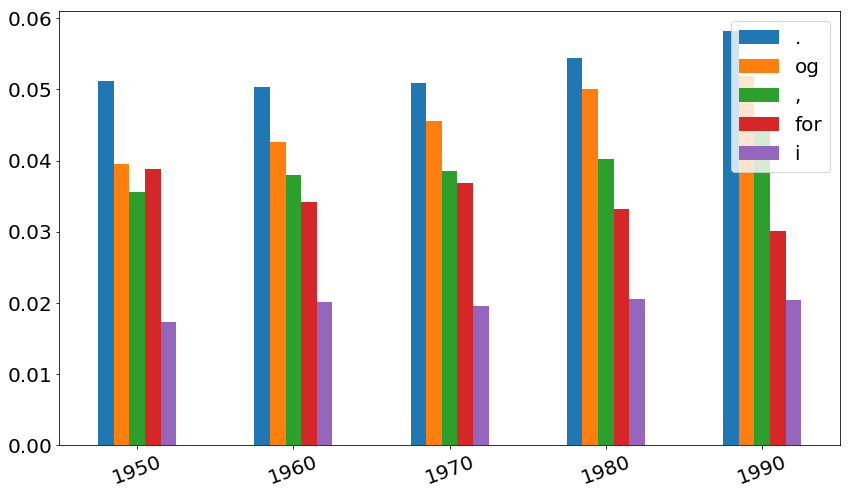

In [51]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [52]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Sosial, Kast, Lov, Guds, Helsevern, Korintierbrev, Prinsens, Avdeling, Psykisk, Presten, Diakoni, Avdelingsstyret, Autoritet</span>

## subst
<span style='font-size:1.1em'>sosial, kjærlighet, helsevern, godhet, omsorg, omtanke, barnevern, syke, medmennesker, sorg, barn, barnet, vennlighet, gjennomgåelse, eder, trygghet, barna, diakoni, medmenneskelighet, forsørgere, forbønn, ømhet, takken, ansvar, nestekjærlighet, sosialtrygd, eldreomsorg, hjertelag, diakonien, omsorgen, toleranse, mennesket, hjemmet, oppdragelse, sosialhjelp, ektefeller, barnebarn, kjærleik, sial, livsopphold</span>
## verb
<span style='font-size:1.1em'>pleie, trygd, trygder, takk, stell, dra, lignes, desentralisert, varme, trenger, lov, finmales, traktes, mors</span>
## adj
<span style='font-size:1.1em'>kjærlig, utviklingshemmede, psykisk, rørende, medmenneskelig, kjærlige, funksjonshemmede, enslige, sosiale, hjertevarme, moderlig, faderlig, hjemmearbeidende, pleietrengende, spesiell</span>
## unknown
<span style='font-size:1.1em'>edruskapsvern, eders, avdelingsstyret, hjelpsomhet, frembar, hjemmets, eldre-, klientarbeid, kulturformål, trofasthet, internatassistentens, foreldrenes, hjelpande, kistedekorasjon, omstillingstid, kommunaldirektør, elevenes</span>
## det
<span style='font-size:1.1em'>all</span>


# Hvordan utvikler ordene seg?

In [53]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

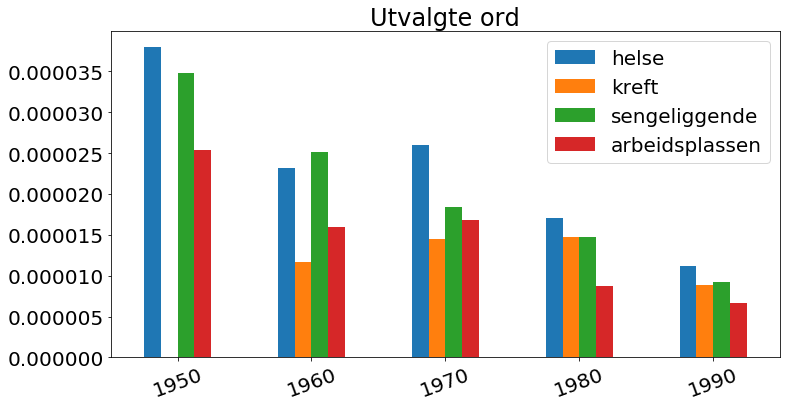

In [54]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

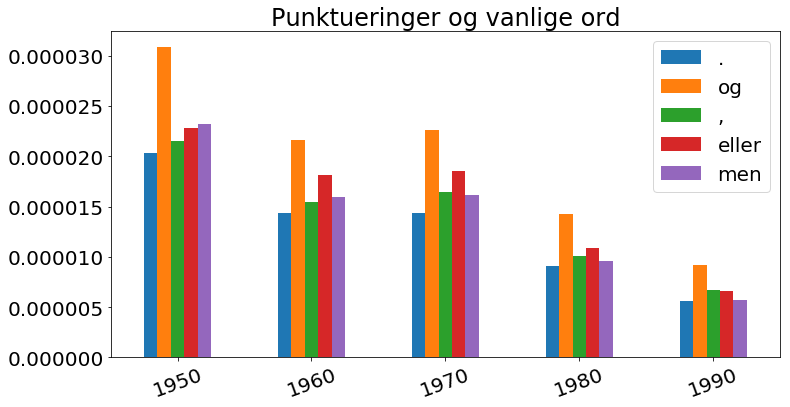

In [55]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord');

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [56]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

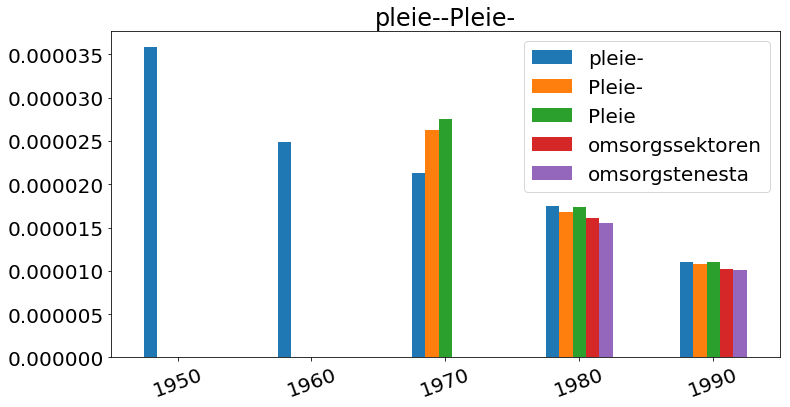

In [57]:
commchart(2, (0,5));

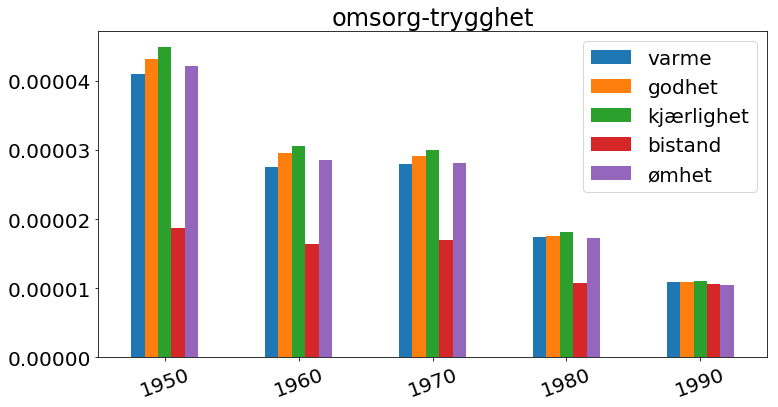

In [58]:
commchart(1, (3, 8))

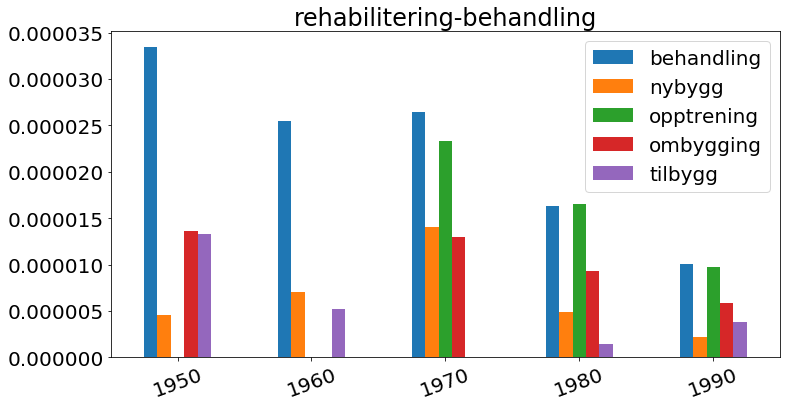

In [59]:
commchart(3)